In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


**Import essential library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

**Load dataset**

In [2]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Corona_NLP_train.csv", engine='python')
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative


In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (41157, 6)
Columns are: Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


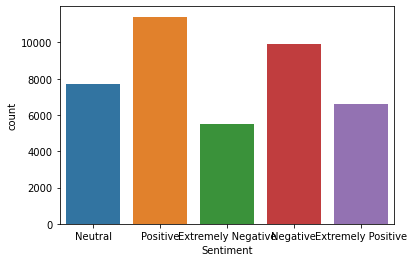

In [6]:
sns.countplot(x = 'Sentiment', data = tweet_df)

**Tweets Text Preprocessing**

In [7]:
d = {'Neutral': 0, 'Positive': 1, 'Extremely Positive': 2,'Extremely Negative': 3}
tweet_df['label'] = tweet_df['Sentiment'].map(d)


In [8]:
tweet_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0


In [10]:
class_count = tweet_df['label'].value_counts()
class_count

1.0    11422
0.0     7713
2.0     6624
3.0     5481
Name: label, dtype: int64

Text(0, 0.5, 'Number of reviews ')

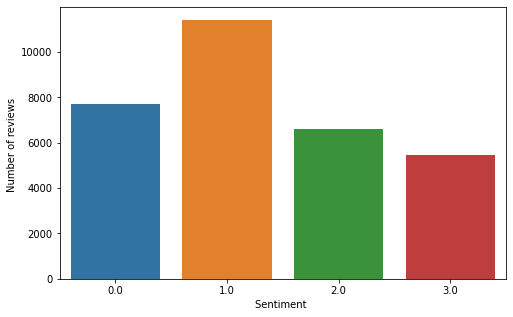

In [11]:
import warnings
warnings.simplefilter("ignore")
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

**Text Processing**

*   Remove punctuations
*   Tokenization - Converting a sentence into list of words
*   Remove stopwords
*   Lammetization/stemming - Tranforming any form of a word to its root word

**Remove punctuations**

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['Tweet_punct'] = tweet_df['OriginalTweet'].apply(lambda x: remove_punct(x))
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa and httpstcoxXghGFzCC and httpstcoINlzdxNo
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID ou...
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0,My food stock is not the only one which is empty\r\r\n\r\r\nPLEASE dont panic THERE WILL BE ENOU...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID outbreak\r\r\n\r\r\nNot because Im paranoid but b...
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, peo...",Positive,1.0,As news of the regions first confirmed COVID case came out of Sullivan County last week people ...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he comme...,Positive,1.0,Cashier at grocery store was sharing his insights on Covid To prove his credibility he commented...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #cov...,Neutral,0.0,Was at the supermarket today Didnt buy toilet paper Rebel\r\r\n\r\r\ntoiletpapercrisis covid htt...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business ...,Positive,1.0,Due to COVID our retail store and classroom in Atlanta will not be open for walkin business or c...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment m...",Negative,NaN,For corona preventionwe should stop to buy things with the cash and should use online payment me...


**Tokenization**

In [15]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_df['Tweet_tokenized'] = tweet_df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct,Tweet_tokenized
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa and httpstcoxXghGFzCC and httpstcoINlzdxNo,"[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, and, httpstcoxxghgfzcc, and, httpstcoinlzdxno]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,"[advice, talk, to, your, neighbours, family, to, exchange, phone, numbers, create, contact, list..."
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID ou...,"[coronavirus, australia, woolworths, to, give, elderly, disabled, dedicated, shopping, hours, am..."
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0,My food stock is not the only one which is empty\r\r\n\r\r\nPLEASE dont panic THERE WILL BE ENOU...,"[my, food, stock, is, not, the, only, one, which, is, empty, please, dont, panic, there, will, b..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID outbreak\r\r\n\r\r\nNot because Im paranoid but b...,"[me, ready, to, go, at, supermarket, during, the, covid, outbreak, not, because, im, paranoid, b..."
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, peo...",Positive,1.0,As news of the regions first confirmed COVID case came out of Sullivan County last week people ...,"[as, news, of, the, region, s, first, confirmed, covid, case, came, out, of, sullivan, county, l..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he comme...,Positive,1.0,Cashier at grocery store was sharing his insights on Covid To prove his credibility he commented...,"[cashier, at, grocery, store, was, sharing, his, insights, on, covid, to, prove, his, credibilit..."
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #cov...,Neutral,0.0,Was at the supermarket today Didnt buy toilet paper Rebel\r\r\n\r\r\ntoiletpapercrisis covid htt...,"[was, at, the, supermarket, today, didnt, buy, toilet, paper, rebel, toiletpapercrisis, covid, h..."
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business ...,Positive,1.0,Due to COVID our retail store and classroom in Atlanta will not be open for walkin business or c...,"[due, to, covid, our, retail, store, and, classroom, in, atlanta, will, not, be, open, for, walk..."
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment m...",Negative,NaN,For corona preventionwe should stop to buy things with the cash and should use online payment me...,"[for, corona, preventionwe, should, stop, to, buy, things, with, the, cash, and, should, use, on..."


**Remove stopwords**

In [17]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweet_df['Tweet_nonstop'] = tweet_df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa and httpstcoxXghGFzCC and httpstcoINlzdxNo,"[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, and, httpstcoxxghgfzcc, and, httpstcoinlzdxno]","[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,"[advice, talk, to, your, neighbours, family, to, exchange, phone, numbers, create, contact, list...","[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbe..."
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID ou...,"[coronavirus, australia, woolworths, to, give, elderly, disabled, dedicated, shopping, hours, am...","[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, ..."
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0,My food stock is not the only one which is empty\r\r\n\r\r\nPLEASE dont panic THERE WILL BE ENOU...,"[my, food, stock, is, not, the, only, one, which, is, empty, please, dont, panic, there, will, b...","[food, stock, one, empty, please, dont, panic, enough, food, everyone, take, need, stay, calm, s..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID outbreak\r\r\n\r\r\nNot because Im paranoid but b...,"[me, ready, to, go, at, supermarket, during, the, covid, outbreak, not, because, im, paranoid, b...","[ready, go, supermarket, covid, outbreak, im, paranoid, food, stock, litteraly, empty, coronavir..."
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, peo...",Positive,1.0,As news of the regions first confirmed COVID case came out of Sullivan County last week people ...,"[as, news, of, the, region, s, first, confirmed, covid, case, came, out, of, sullivan, county, l...","[news, region, first, confirmed, covid, case, came, sullivan, county, last, week, people, flocke..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he comme...,Positive,1.0,Cashier at grocery store was sharing his insights on Covid To prove his credibility he commented...,"[cashier, at, grocery, store, was, sharing, his, insights, on, covid, to, prove, his, credibilit...","[cashier, grocery, store, sharing, insights, covid, prove, credibility, commented, im, civics, c..."
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #cov...,Neutral,0.0,Was at the supermarket today Didnt buy toilet paper Rebel\r\r\n\r\r\ntoiletpapercrisis covid htt...,"[was, at, the, supermarket, today, didnt, buy, toilet, paper, rebel, toiletpapercrisis, covid, h...","[supermarket, today, didnt, buy, toilet, paper, rebel, toiletpapercrisis, covid, httpstcoevxkqli..."
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business ...,Positive,1.0,Due to COVID our retail store and classroom in Atlanta will not be open for walkin business or c...,"[due, to, covid, our, retail, st

**Stemming and Lammitization**

In [19]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_df['Tweet_stemmed'] = tweet_df['Tweet_nonstop'].apply(lambda x: stemming(x))
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa and httpstcoxXghGFzCC and httpstcoINlzdxNo,"[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, and, httpstcoxxghgfzcc, and, httpstcoinlzdxno]","[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]","[menyrbi, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,"[advice, talk, to, your, neighbours, family, to, exchange, phone, numbers, create, contact, list...","[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbe...","[advic, talk, neighbour, famili, exchang, phone, number, creat, contact, list, phone, number, ne..."
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID ou...,"[coronavirus, australia, woolworths, to, give, elderly, disabled, dedicated, shopping, hours, am...","[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, ...","[coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbre..."
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0,My food stock is not the only one which is empty\r\r\n\r\r\nPLEASE dont panic THERE WILL BE ENOU...,"[my, food, stock, is, not, the, only, one, which, is, empty, please, dont, panic, there, will, b...","[food, stock, one, empty, please, dont, panic, enough, food, everyone, take, need, stay, calm, s...","[food, stock, one, empti, pleas, dont, panic, enough, food, everyon, take, need, stay, calm, sta..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID outbreak\r\r\n\r\r\nNot because Im paranoid but b...,"[me, ready, to, go, at, supermarket, during, the, covid, outbreak, not, because, im, paranoid, b...","[ready, go, supermarket, covid, outbreak, im, paranoid, food, stock, litteraly, empty, coronavir...","[readi, go, supermarket, covid, outbreak, im, paranoid, food, stock, litterali, empti, coronavir..."
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, peo...",Positive,1.0,As news of the regions first confirmed COVID case came out of Sullivan County last week people ...,"[as, news, of, the, region, s, first, confirmed, covid, case, came, out, of, sullivan, county, l...","[news, region, first, confirmed, covid, case, came, sullivan, county, last, week, people, flocke...","[news, region, first, confirm, covid, case, came, sullivan, counti, last, week, peopl, flock, ar..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he comme...,Positive,1.0,Cashier at grocery store was sharing his insights on Covid To prove his credibility he commented...,"[cashier, at, grocery, store, was, sharing, his, insights, on, covid, to, prove, his, credibilit...","[cashier, grocery, store, sharing, insights, covid, prove, credibility, commented, im, civics, c...","[cashier, groceri, store, share, insight, covid, prove, credibl, comment, im, civic, class, know..."
7,3806,48758,Austria,1

In [21]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweet_df['Tweet_lemmatized'] = tweet_df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweet_df.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa and httpstcoxXghGFzCC and httpstcoINlzdxNo,"[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, and, httpstcoxxghgfzcc, and, httpstcoinlzdxno]","[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]","[menyrbi, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]","[menyrbie, philgahan, chrisitv, httpstcoifzfanpa, httpstcoxxghgfzcc, httpstcoinlzdxno]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,1.0,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,"[advice, talk, to, your, neighbours, family, to, exchange, phone, numbers, create, contact, list...","[advice, talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbe...","[advic, talk, neighbour, famili, exchang, phone, number, creat, contact, list, phone, number, ne...","[advice, talk, neighbour, family, exchange, phone, number, create, contact, list, phone, number,..."
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,1.0,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID ou...,"[coronavirus, australia, woolworths, to, give, elderly, disabled, dedicated, shopping, hours, am...","[coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, ...","[coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbre...","[coronavirus, australia, woolworth, give, elderly, disabled, dedicated, shopping, hour, amid, co..."
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,1.0,My food stock is not the only one which is empty\r\r\n\r\r\nPLEASE dont panic THERE WILL BE ENOU...,"[my, food, stock, is, not, the, only, one, which, is, empty, please, dont, panic, there, will, b...","[food, stock, one, empty, please, dont, panic, enough, food, everyone, take, need, stay, calm, s...","[food, stock, one, empti, pleas, dont, panic, enough, food, everyon, take, need, stay, calm, sta...","[food, stock, one, empty, please, dont, panic, enough, food, everyone, take, need, stay, calm, s..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID outbreak\r\r\n\r\r\nNot because Im paranoid but b...,"[me, ready, to, go, at, supermarket, during, the, covid, outbreak, not, because, im, paranoid, b...","[ready, go, supermarket, covid, outbreak, im, paranoid, food, stock, litteraly, empty, coronavir...","[readi, go, supermarket, covid, outbreak, im, paranoid, food, stock, litterali, empti, coronavir...","[ready, go, supermarket, covid, outbreak, im, paranoid, food, stock, litteraly, empty, coronavir..."
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,"As news of the regions first confirmed COVID-19 case came out of Sullivan County last week, peo...",Positive,1.0,As news of the regions first confirmed COVID case came out of Sullivan County last week people ...,"[as, news, of, the, region, s, first, confirmed, covid, case, came, out, of, sullivan, county, l...","[news, region, first, confirmed, covid, case, came, sullivan, county, last, week, people, flocke...","[news, region, first, confirm, covid, case, came, sullivan, counti, last, week, peopl, flock, ar...","[news, region, first, confirmed, covid, case, came, sullivan, county, las

In [22]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [29]:
# saving the dataframe 
#tweet_df.to_csv('D:/Fake news/TWETTS NLP/processing_file.csv') 
#tweet_df.to_csv('D:/Fake news/TWETTS NLP/processing_file.csv)
tweet_df.to_csv('/content/drive/My Drive/Colab Notebooks/Data/processing_file.csv')